In [1]:
# %matplotlib notebook
import NN_Module as nnm
import torch
import numpy as np
import numpy.ma as ma
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math
import time
import pandas as pd
from pandas import read_csv

In [2]:
# Functions

# Target function to approximate
def target_func(input):
    """
    This is the fucntion the network will try to approximate.

    Inputs: input (Pytorch tensor)

    Outputs: output (Pytorch tensor)
    """
    return torch.unsqueeze(input[:,0]**2 * torch.cos(input[:,1]), 1)

In [3]:
# Hyperparameters
parameters = {}
parameters['N'] = 2
parameters['train_size'] = 1000000
parameters['test_size'] = 10000
parameters['hidden_nodes'] = 500
parameters['hidden_layers'] = 4
parameters['batch_size'] = 1000
parameters['n_epochs'] = 80
parameters['learning_rate'] = 1e-4
parameters['lr_red_factor'] = 0.2
parameters['lr_red_patience'] = 5
parameters['lr_red_threshold'] = 1e-2
parameters['weight_decay'] = 0

# Graphing parameters
parameters['accu_out_resolution'] = 100
parameters['out_residual_resolution'] = 100

In [4]:
# Create a list of sets of N random numbers, the training set
inputs = (100 * torch.rand((parameters['train_size'],parameters['N']),dtype=torch.float32) - 50).cuda()
outputs = target_func(inputs)

In [5]:
# create a test set
test_inputs = (100 * torch.rand((parameters['test_size'],parameters['N']),dtype=torch.float32) - 50).cuda() # Uniform
# test_inputs = torch.randn((test_size,N),dtype=torch.float32).cuda() # Normal
test_outputs = target_func(test_inputs)

In [6]:
# Standardize data sets
input_stats = nnm.find_stats(inputs)
output_stats = nnm.find_stats(outputs)
std_inputs = nnm.affine_transform(inputs, input_stats)
std_test_inputs = nnm.affine_transform(test_inputs, input_stats) # Not actually normal; Only std_inputs is normal
std_outputs = nnm.affine_transform(outputs, output_stats)
std_test_outputs = nnm.affine_transform(test_outputs, output_stats)

In [7]:
# Don't standardize
'''
input_stats = (0, 1)
output_stats = (0, 1)
std_inputs = inputs
std_test_inputs = test_inputs
std_outputs = outputs
std_test_outputs = test_outputs
'''

'\ninput_stats = (0, 1)\noutput_stats = (0, 1)\nstd_inputs = inputs\nstd_test_inputs = test_inputs\nstd_outputs = outputs\nstd_test_outputs = test_outputs\n'

In [8]:
# Create a model
model = nnm.create_model(inputs, outputs, parameters)

In [9]:
# Train the model
graph_data = nnm.train_network(model, std_inputs, std_outputs, std_test_inputs, std_test_outputs, output_stats, parameters)

=>Starting 1/80 epochs.
=>Starting 11/80 epochs.
=>Starting 21/80 epochs.
=>Starting 31/80 epochs.
=>Starting 41/80 epochs.
=>Starting 51/80 epochs.
=>Starting 61/80 epochs.
=>Starting 71/80 epochs.
Training done!


{'fig_param': <Figure size 432x288 with 1 Axes>,
 'ax_param': <matplotlib.axes._subplots.AxesSubplot at 0x2af4aa9dde48>,
 'fig_loss': <Figure size 432x288 with 1 Axes>,
 'ax_loss': <matplotlib.axes._subplots.AxesSubplot at 0x2af4b2dee400>,
 'fig_accu': <Figure size 432x288 with 1 Axes>,
 'ax_accu': <matplotlib.axes._subplots.AxesSubplot at 0x2af4b2de2ac8>,
 'fig_accu_out': <Figure size 432x288 with 3 Axes>,
 'ax_out_freq': <matplotlib.axes._subplots.AxesSubplot at 0x2af4b322b1d0>,
 'ax_accu_out': <matplotlib.axes._subplots.AxesSubplot at 0x2af4b325f3c8>,
 'fig_out_residual': <Figure size 432x288 with 2 Axes>,
 'ax_out_residual': <matplotlib.axes._subplots.AxesSubplot at 0x2af4b3291ac8>,
 'fig_histograms': <Figure size 432x288 with 2 Axes>,
 'ax_weights': <matplotlib.axes._subplots.AxesSubplot at 0x2af4b32d21d0>,
 'ax_biases': <matplotlib.axes._subplots.AxesSubplot at 0x2af4b33043c8>}

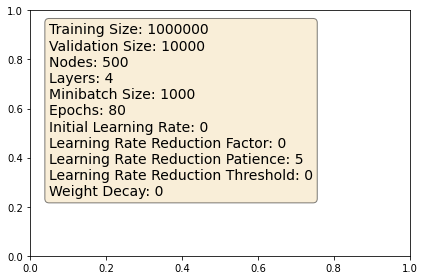

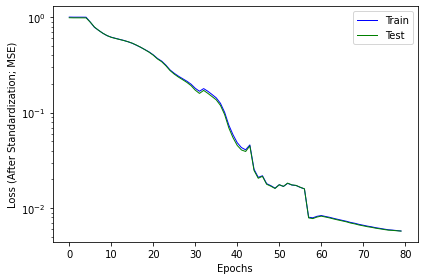

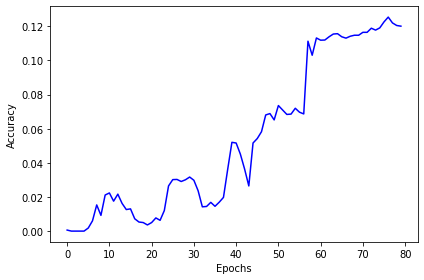

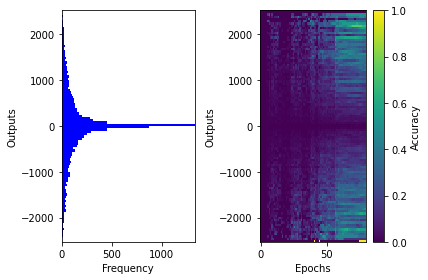

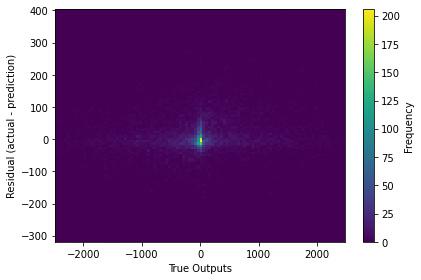

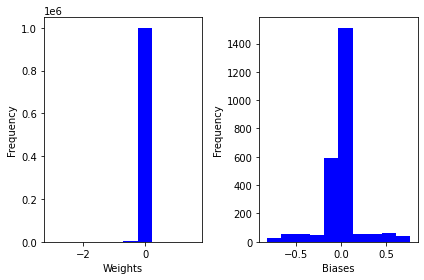

In [10]:
# Graphing
graphs = nnm.new_graphs()
nnm.graphing(graphs, graph_data, parameters)

In [11]:
# Show graphs
nnm.show_graphs(graphs)

In [17]:
# Save all graphs
nnm.save_graphs(graphs, 'x^2cos(y) 1M 1000b 1e-4lr 500n 4l 80e.pdf')

In [10]:
# Save graphs
graphs['fig_loss'].savefig('loss.pdf')
graphs['fig_accu'].savefig('accu.pdf')
graphs['fig_accu_out'].savefig('accu_out.pdf')
graphs['fig_out_residual'].savefig('out_residual.pdf')
graphs['fig_histograms'].savefig('histograms.pdf')

In [15]:
# Analysis
parameters1 = {}
parameters1['N'] = 2
parameters1['train_size'] = 1000000 # Keep same with beginning
parameters1['test_size'] = 10000 # Keep same with beginning
parameters1['hidden_nodes'] = 100
parameters1['hidden_layers'] = 1
parameters1['batch_size'] = 1000
parameters1['n_epochs'] = 10
parameters1['learning_rate'] = 1e-4
parameters1['lr_red_factor'] = 0.2
parameters1['lr_red_patience'] = 40
parameters1['lr_red_threshold'] = 1e-2
parameters1['weight_decay'] = 0
parameters1['accu_out_resolution'] = 100
parameters1['out_residual_resolution'] = 100
param_list = [parameters1]
trials = 3 # The number of trials for each configuration
analysis_data = nnm.analyze(param_list, trials, std_inputs, std_outputs, std_test_inputs, std_test_outputs, output_stats)

Training done!
Training done!
Training done!


/scratch365/sliu24/NN_Module.py:434: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  analysis_graphs['fig_analysis'].tight_layout()


{'fig_analysis': <Figure size 432x288 with 1 Axes>,
 'ax_analysis': <matplotlib.axes._subplots.AxesSubplot at 0x2af4b2dd7fd0>}

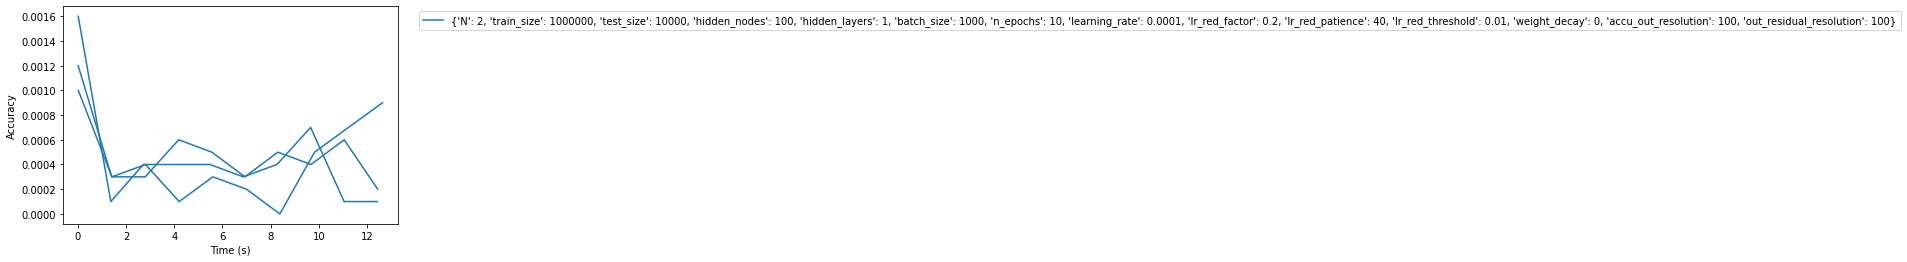

In [16]:
# Graphing
analysis_graphs = nnm.new_analysis_graphs()
nnm.analysis_graphing(analysis_graphs, analysis_data, param_list, trials)

In [ ]:
analysis_graphs['fig_analysis'].savefig('analysis.pdf')

In [22]:
# Send data to be displayed
df = pd.DataFrame(data=analysis_data)

In [23]:
# Display analysis data
### Make graphs
print(df)

     nodes  layers  epochs      time  accuracy
0    100.0     1.0     0.0  0.024497     0.001
1    100.0     1.0     1.0  0.192594     0.002
2    100.0     1.0     2.0  0.347872     0.004
3    100.0     1.0     3.0  0.503090     0.008
4    100.0     1.0     4.0  0.664804     0.015
..     ...     ...     ...       ...       ...
445  100.0     1.0    45.0  7.133812     0.063
446  100.0     1.0    46.0  7.292924     0.070
447  100.0     1.0    47.0  7.449513     0.076
448  100.0     1.0    48.0  7.604756     0.079
449  100.0     1.0    49.0  7.766390     0.081

[450 rows x 5 columns]


In [17]:
# Uploads existing data and adds it to working dataset
# file_upload = read_csv("NN_Test_Data_1.csv")
# print(file_upload)
# df = df.append(file_upload)

In [24]:
# Saves run data as csv file
df.to_csv("NN_Test_Data_1.csv", index=False)